# Exploratory Data Analysis on Bank Churn

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warningsa
warnings.filterwarnings('ignore')

In [3]:
# pip install xgboost

In [2]:
path = r"Churn_Modelling.csv"
df= pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Summary of numerical columns 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [54]:
# Removing Columns we wont need
# df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1,inplace=True)

In [55]:
# Looking at the number of rolls and columns
df.shape

(10000, 11)

In [8]:
# Displaying the column names of the dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [56]:
Looking at the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [4]:
# Looking out for Null Values
df.isna().sum().sum()

0

In [6]:
# df.nunique().sort_values(ascending=False)

In [7]:
# Looking at the amount of customers who churned (0=Not Churned, 1=Churned)
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [5]:
# plt.pie(df['Exited'].value_counts(), autopct='%1.1f%%')
# label = ('Remain')
# plt.legend(label)
# plt.title('WHo Left?');

### Exploratory Data Analysis

#### Univariate Analysis

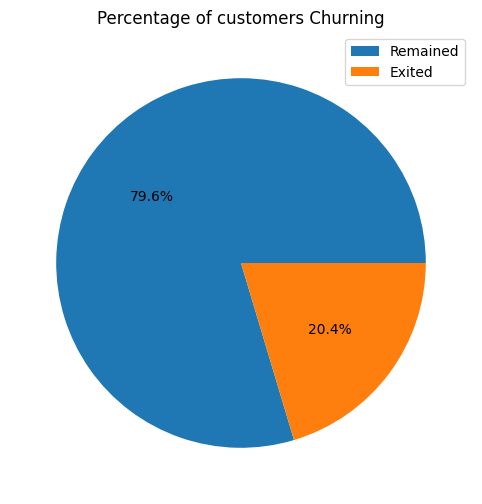

In [17]:
#Pie chart showing Percentage of Churning Customers
plt.figure(figsize=(12,6))
plt.pie(df['Exited'].value_counts(), autopct='%1.1f%%')
label = ('Remained', 'Exited')
plt.legend(label)
plt.title('Percentage of customers Churning');

Only 20.4% of customers churned 

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

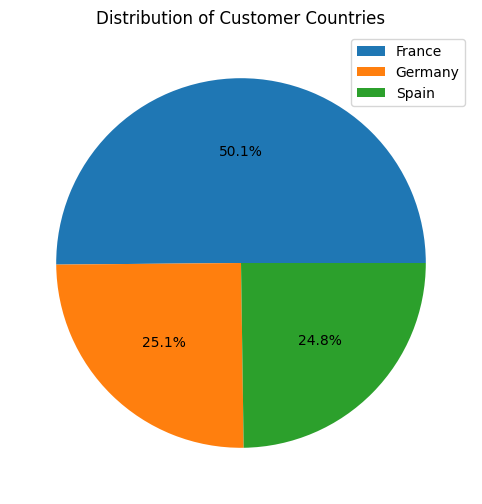

In [16]:
# Viz showing countries of customers
labels = ('France','Germany', 'Spain')
plt.figure(figsize=(12,6))
plt.pie(df['Geography'].value_counts(), autopct='%1.1f%%')
plt.title('Distribution of Customer Countries')
plt.legend(labels);
df['Geography'].value_counts()

France has more than half of all customers with 50.1%, with Germany having 25.1% and Spain with the least amount of 24.8%

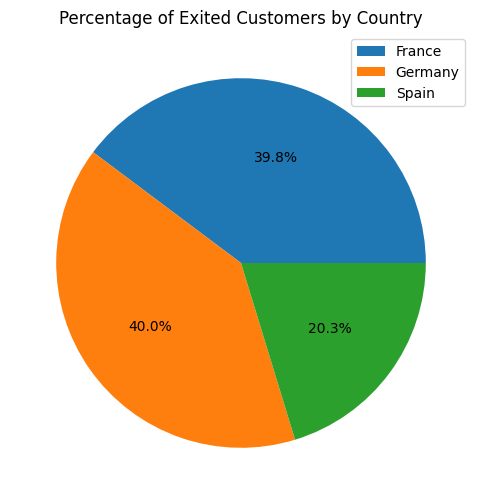

In [15]:
#Percentage of Exited customers from countries
france=df.loc[df['Geography']=='France'].loc[df['Exited']==1].count()[0]
germany=df.loc[df['Geography']=='Germany'].loc[df['Exited']==1].count()[0]
spain=df.loc[df['Geography']=='Spain'].loc[df['Exited']==1].count()[0]

labels = ('France','Germany', 'Spain')
plt.figure(figsize=(12,6))
plt.pie((france,germany,spain), autopct='%1.1f%%')
plt.title('Percentage of Exited Customers by Country')
plt.legend(labels);

Germany has 40% of Exited customers the most, dispite having 25% of the total sample

Gender
Male      5457
Female    4543
Name: count, dtype: int64

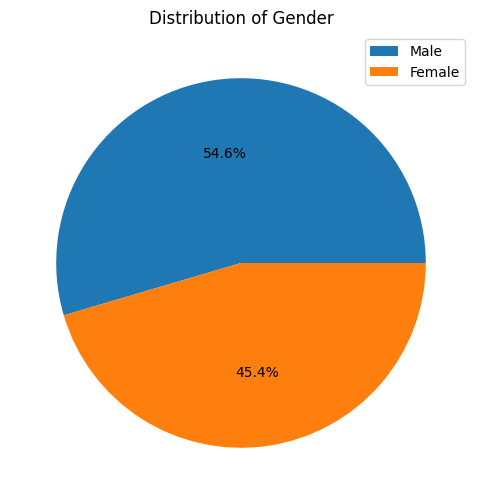

In [14]:
# Pie chart of Gender of Customer
labels = ('Male','Female')
plt.figure(figsize=(12,6))
plt.pie(df['Gender'].value_counts(), autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.legend(labels);
df['Gender'].value_counts()

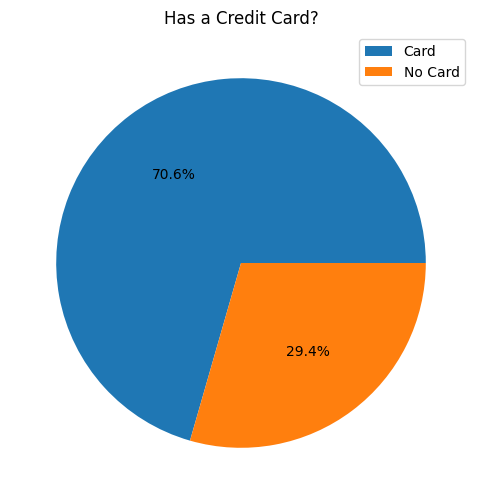

In [18]:
plt.figure(figsize=(12,6))
labels=('Card', 'No Card')
plt.pie(df['HasCrCard'].value_counts(), autopct='%1.1f%%')
plt.legend(labels)
plt.title('Has a Credit Card?');

In [84]:
# df.loc[df['Exited']==1].loc[df['Gender']=='Female'].count()
# df.head()
# sns.barplot(data=df, y ='Exited', x = 'Gender');

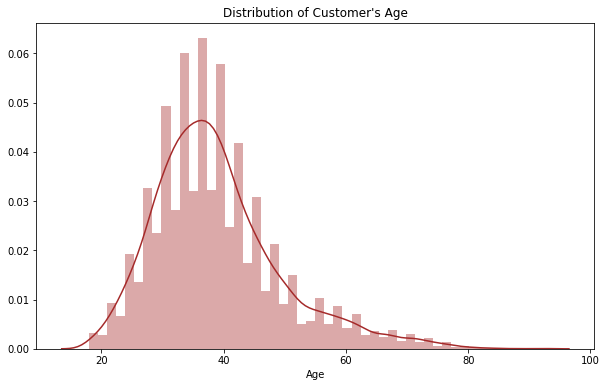

In [62]:
plt.figure(figsize=(10,6))
sns.distplot(df['Age'], color='brown')
plt.title("Distribution of Customer's Age");

The customers age follows a fairly normal distribution with the most cutomers being in their late 30s

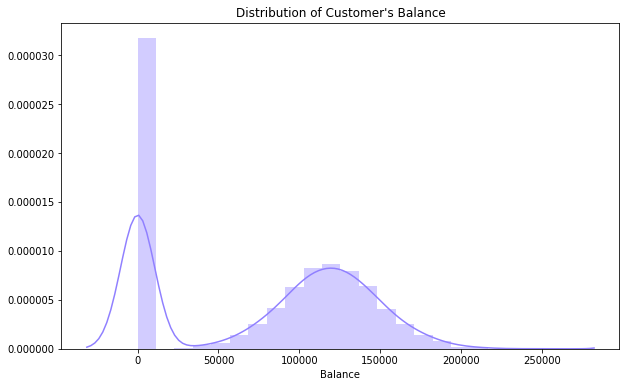

In [99]:
plt.figure(figsize=(10,6))
sns.distplot(df['Balance'], color='#9080ff')
plt.title("Distribution of Customer's Balance");

Most of the customers have a balance of 0

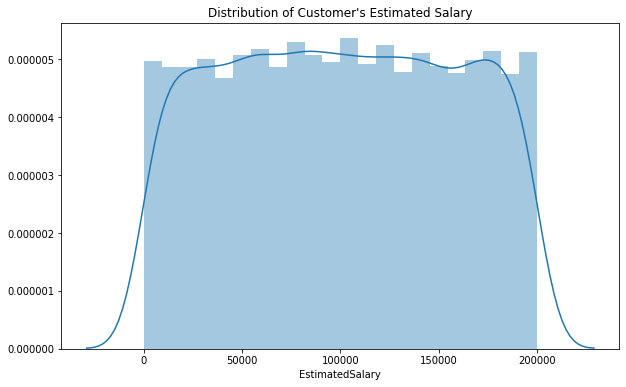

In [95]:
plt.figure(figsize=(10,6))
sns.distplot(df['EstimatedSalary'])
plt.title("Distribution of Customer's Estimated Salary");

The estimated salary of customers ranges from 0 to 200,000 being equally distributed amongst customers

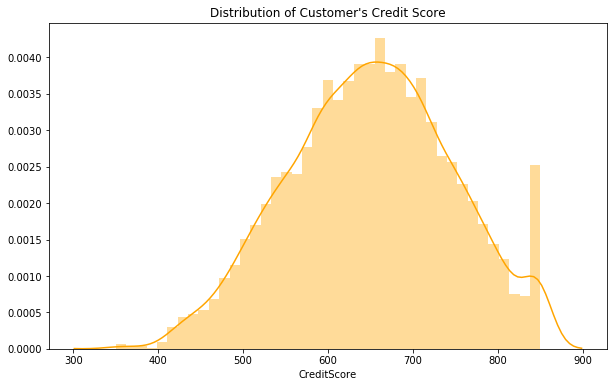

In [102]:
plt.figure(figsize=(10,6))
sns.distplot(df['CreditScore'], color='orange')
plt.title("Distribution of Customer's Credit Score");

The credit score of customers is skewed rightwards as majority of customers have a score of over 600

#### Multivariate Analysis <br>
The features would be explored against the target variable ('Exited'), to show the relationship and corrolation between them.


In [116]:
# sns.pairplot(df)
# plt.figure(figsize=(18,10));

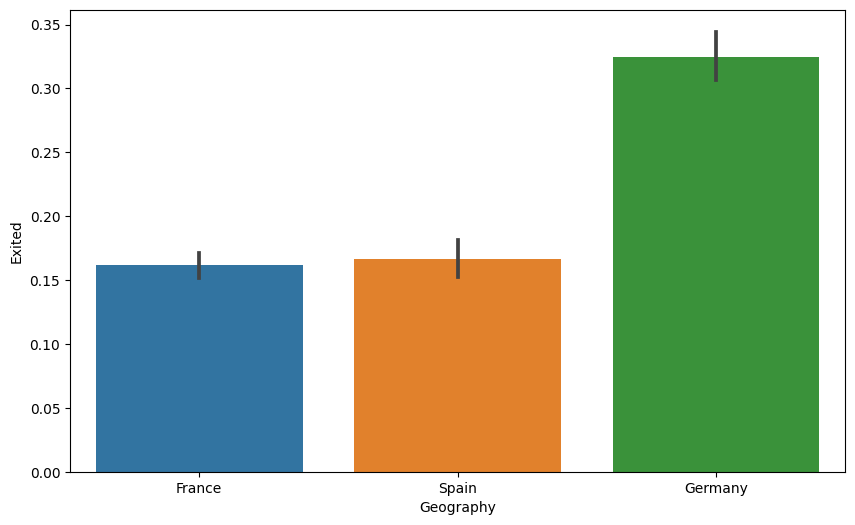

In [20]:
# Exploring Geography feature against customers who exited
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Geography', y='Exited',);
# Germany churn the most dispite lower number in sample

Germany, despite have 25.1% of the sample, account for over 39.8% of the customers who churn

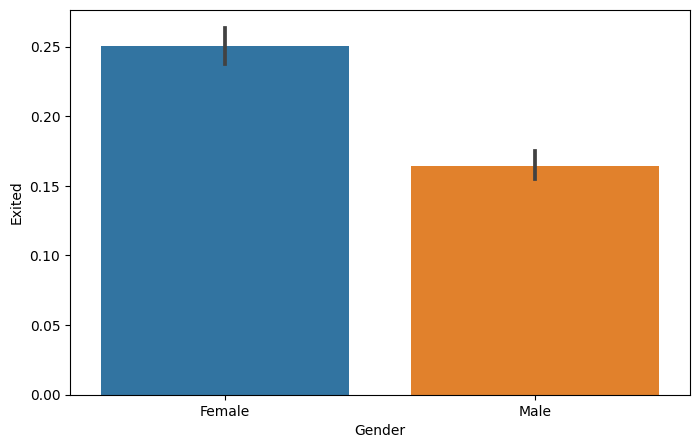

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Gender', y='Exited');

Females also churn more, dispite them having 45.5% of the total sample! They account for over 50% of churned customers

In [27]:
# print(f' Male Churns: {df.loc[df["Gender"]=="Male"].loc[df["Exited"]==1].count()[0]}')
# print(f' Female Churns: {df.loc[df["Gender"]=="Female"].loc[df["Exited"]==1].count()[0]}')

 Male Churns: 898
 Female Churns: 1139


60

In [43]:
# # Percentage of Females who are German
# # francefemale=df.loc[df['Gender']=='Female'].loc[df['Geography']=='France'].loc[df['Exited']==1].count()[0]
# # germanyfemale=df.loc[df['Gender']=='Female'].loc[df['Geography']=='Germany'].loc[df['Exited']==1].count()[0]
# # spainfemale=df.loc[df['Gender']=='Female'].loc[df['Geography']=='Spain'].loc[df['Exited']==1].count()[0]

# df.loc[df['']]

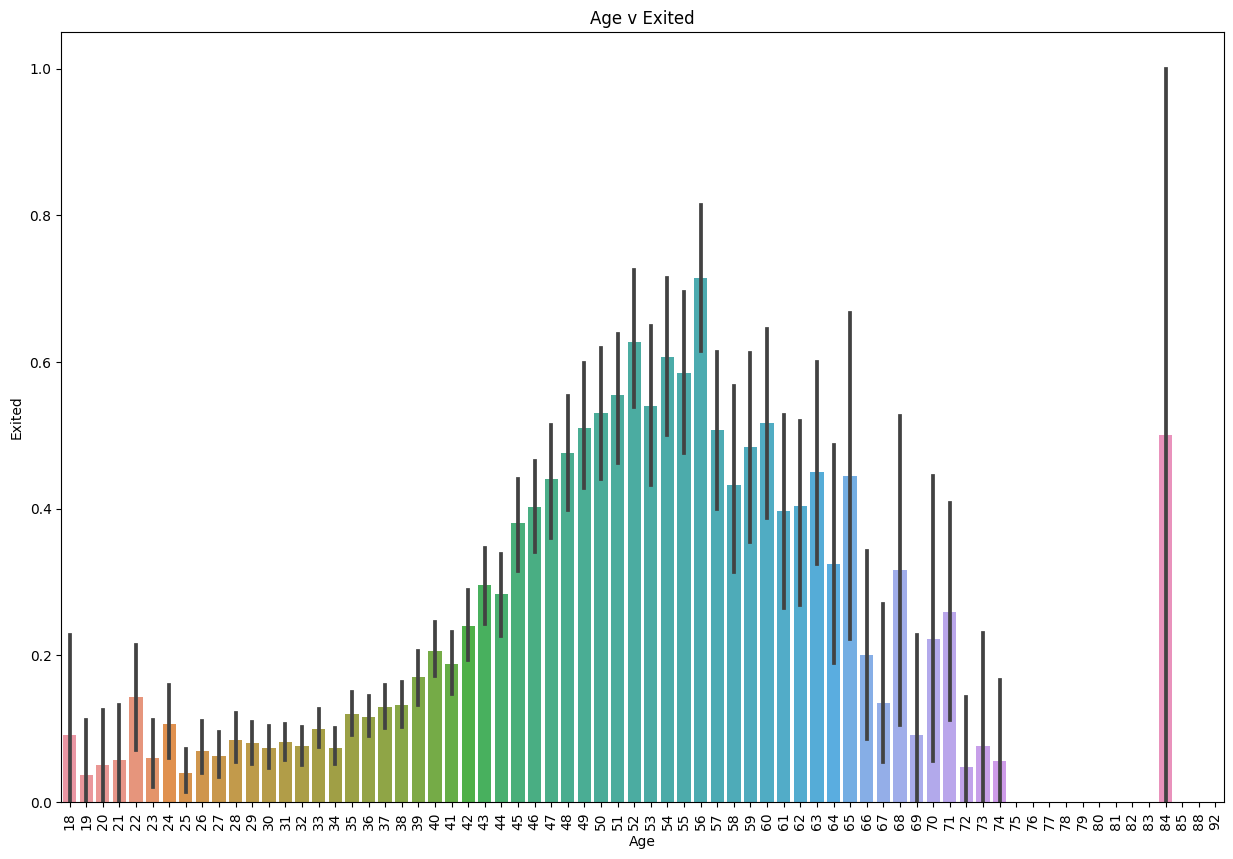

In [46]:
# Bar Chart showing probability of churning by customers Age
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='Age', y='Exited')
plt.xticks(rotation=90)
plt.title("Age v Exited");

Ages 44 - 65 have the most churn, people older churn less, young people churn the least. 1 outlier at age 84 which a customer churned, this is because no customer above the age of 74 churned 0/54. 

In [83]:
# # Locating Oulier
# df[df['Age']> 74].sort_values('Exited', ascending=False).head(1)
df1=df.drop(index=3531)
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


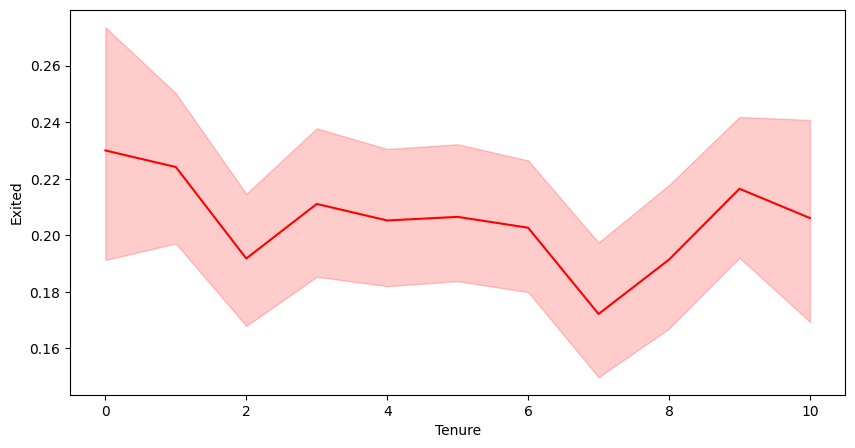

In [84]:
# Bar Chart showing the probabilty of Customers Churning based on their Tenure
plt.figure(figsize=(10,5))
sns.lineplot(data=df1, x='Tenure', y='Exited', color='red');

Customers who have 0 Tenure churn the most while customers between 6-7 churn the least, also those with 9 churn a high amount

In [113]:
# The amount of churns per Tenure
tenure_churn = df.groupby(['Tenure', 'Exited']).size().reset_index(name='Count')
tenure_churn[tenure_churn['Exited']==1].sort_values('Count', ascending=False)
# print(tenure_churn)
# plt.bar(tenure_churn['Tenure'], tenure_churn['Count'])

,Tenure,Exited,Count
3,1,1,232
7,3,1,213
19,9,1,213
11,5,1,209
9,4,1,203
5,2,1,201
17,8,1,197
13,6,1,196
15,7,1,177
21,10,1,101


Customers with 1 tenure churn the most, although customers with 9 tenure churn the third most as per the table, in general customers woth a higher tenure churn less than those with less

In [201]:
# plt.figure(figsize=(15,6))
# plt.xticks(rotation=90)
# sns.barplot(data=df, x='Geography', y='EstimatedSalary', hue='Gender',color='teal');

In [202]:
# plt.figure(figsize=(15,6))
# plt.xticks(rotation=90)
# sns.barplot(data=df, x='Geography', y='CreditScore', hue='Gender',color='#ffa300');

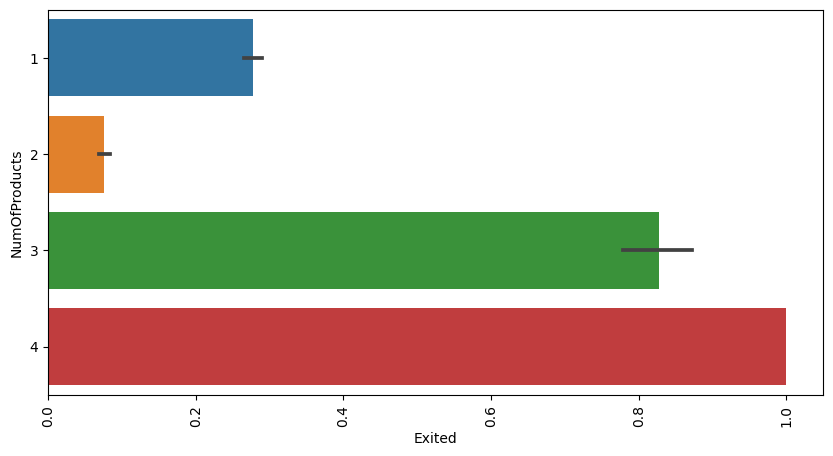

In [117]:
# Probability of Churn based on NumOfProducts
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(data=df, y='NumOfProducts',x='Exited', orient='h');

Customers with more products Churned with 4 and 3 churning significantly more than those with 2 or 1

In [33]:
# CreditScore v Exited
# plt.figure(figsize=(20,15))
# sns.barplot(data=df, x='CreditScore', y='Exited', units='Gender')
# plt.title('CreditScore v Exited')

In [130]:
# # Scatter Plot showing relationship between Balance and Exited
# plt.figure(figsize=(15,8))
# plt.xticks(rotation=90)
# sns.scatterplot(data=df, x='EstimatedSalary', y='Balance', hue='Exited');

df.groupby(['Exited', 'Balance']).size().reset_index(name='Count')

,Exited,Balance,Count
0,0,0.00,3117
1,0,14262.80,1
2,0,16893.59,1
3,0,27288.43,1
4,0,27517.15,1
...,...,...,...
6379,1,213146.20,1
6380,1,216109.88,1
6381,1,222267.63,1
6382,1,238387.56,1


<Axes: xlabel='Balance', ylabel='Exited'>

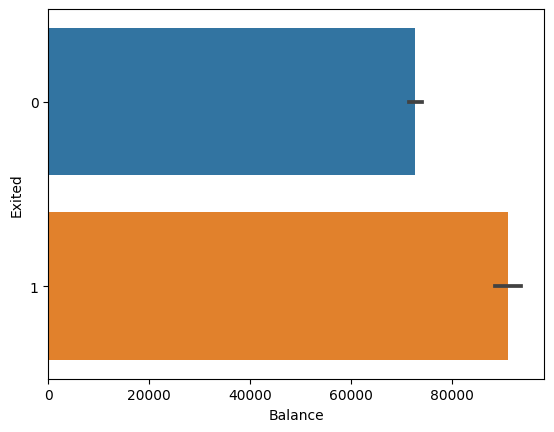

In [126]:
# Balance v Exited
sns.barplot(data=df, y='Exited', x='Balance',orient='h')

In [41]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

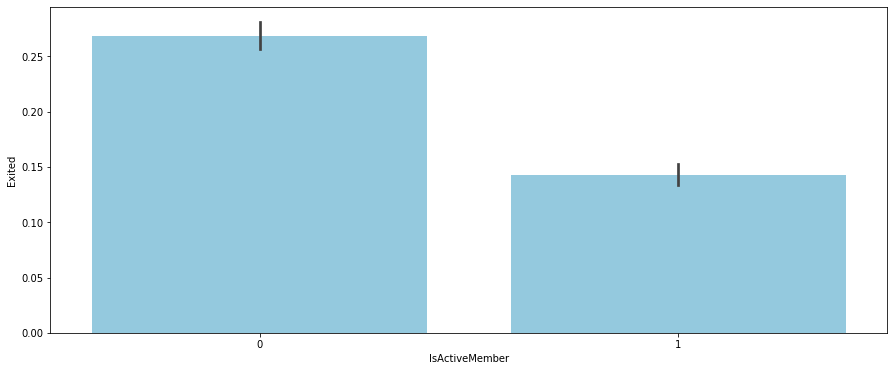

In [49]:
plt.figure(figsize=(15,6))
# plt.xticks(rotation=90)
sns.barplot(data=df, x='IsActiveMember', y='Exited', color='skyblue');

**If a member is not active, he is more likely to Exited**

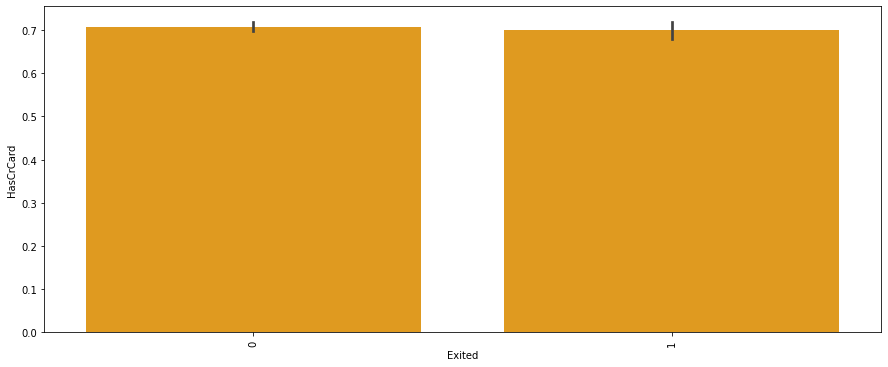

In [50]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(data=df, x='Exited', y='HasCrCard', color='#ffa300');

In [16]:
# corr = df.corr()*10
# corr
# Plotting Heatmap
# plt.figure(figsize=(15,10))
# sns.heatmap(corr, annot=True)

In [107]:
df['GeographyTest'].unique()

array([1, 3, 2])